In [1]:

# =============================================================================
# 
import os
import netCDF4 as nc
import pandas as pd

import numpy as np
import numpy.ma as ma

import xarray as xr

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.style as mplstyle
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.shapereader import Reader
import cartopy.io.shapereader as shpreader
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import netCDF4 as nc
from netCDF4 import Dataset
import shapefile
import time
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns  # 引入seaborn

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import geopandas as gpd
import os
import cartopy.crs as ccrs

import geopandas as gpd
import matplotlib.pyplot as plt

import cmaps
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm

import sys
import os
# 将目标模块所在的路径添加到 sys.path 中
sys.path.append(r"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/Library")
from MeteoVarPlot import draw_2DVAR, draw_Bias, draw_VARtemporal, draw_Bias_subplot,draw_2DVAR_subplot

In [2]:
def get_letter(i):
    if 0 <= i < 26:
        return chr(ord('a') + i)
    else:
        return None  # 或者你可以选择抛出异常或返回其他值  
    
def readVar(VarName, start_date, end_date):
    # 生成日期范围
    delta = end_date - start_date
    date_range = [start_date + timedelta(days=i) for i in range(delta.days + 1)]
    VARall = np.zeros([10,360,620])
    for i,date in enumerate(date_range):
        Year = date.year
        Month = date.month
        Day = date.day
        if VarName=="Prec":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/Prec"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}.CHM_PRE"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["Prec"][:]
        elif VarName==MODEL_NAME:
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/{MODEL_NAME}"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}.{MODEL_NAME}_SM000010.nc"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["SM"][:]     
        elif VarName=="ERA5_Land":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/ERA5_Land"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.ERA5_Land"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["ERA5_Land"][:]   
        elif VarName=="GLDAS_Noah":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/GLDAS_Noah"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.GLDAS_Noah"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["GLDAS_Noah"][:]        
        elif VarName=="AMSR_CN*":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/AMSR_CN"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.AMSR_CN"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["AMSR_CN"][:]           
        elif VarName=="GDS_Daily":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/GDS_Daily"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.GDS_Daily"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["GDS_Daily"][:]                 
        elif VarName=="CLDAS*":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/CLDAS"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.CLDAS"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["CLDAS"][:]         
        elif VarName=="SMCI*":
            DataPath = f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/SMCI"
            FileName = f"{Year}{str(Month).zfill(2)}{str(Day).zfill(2)}00.SMCI"
            FileFullPath = f"{DataPath}/{FileName}"
            with Dataset(FileFullPath) as VARnc:
                VARall[i] = VARnc.variables["SMCI"][:]  
    VARall[VARall<0]=np.nan
    VARall[VARall>999]=np.nan
    VARmean = np.nanmean(VARall,axis=0)
    return VARmean
    # print(FileFullPath)
from datetime import datetime, timedelta

def get_MONTH_abbr(MONTH):
    # 定义一个包含月份英文缩写的列表
    MONTH_abbr = [
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ]
    # 检查输入是否在有效范围内
    if 1 <= MONTH <= 12:
        return MONTH_abbr[MONTH - 1]
    else:
        return "Invalid MONTH"
    
def get_month_period(i, year, month):
    if i not in [0, 1, 2]:
        return "Invalid input. Please enter 0 for early, 1 for mid, and 2 for late period of the month."
    
    # 获取该月的第一天和最后一天
    first_day = datetime(year, month, 1)
    last_day = datetime(year, month + 1, 1) - timedelta(days=1)
    
    MONTH_abbr =get_MONTH_abbr(month)
    
    if i == 0:  # 上旬
        start_date = first_day
        end_date = first_day + timedelta(days=9)
        period_name = f"Early-{MONTH_abbr}"
    elif i == 1:  # 中旬
        start_date = first_day + timedelta(days=10)
        end_date = first_day + timedelta(days=19)
        period_name = f"Mid-{MONTH_abbr}"
    else:  # 下旬
        start_date = first_day + timedelta(days=20)
        end_date = first_day + timedelta(days=29)
        period_name = f"Late-{MONTH_abbr}"
    
    return (start_date, end_date, period_name)

def abbre_to_full(abbreviation):
    # 定义缩写到全称的映射字典
    abbreviation_mapping = {
        "RF": "RandomForest",
        "LGBM": "LightGBM",
        "CB": "CSMX",
        "XGB": "XGBoost",
        # "WHO": "World Health Organization"
    }

    # 查找缩写对应的全称
    full_name = abbreviation_mapping.get(abbreviation.upper())

    if full_name:
        return full_name
    else:
        return f"未找到 '{abbreviation}' 的全称。"
# =============================================================================
# =============================================================================
MODEL_NAME = "CB"
MODEL_FULL_FNAME = abbre_to_full(MODEL_NAME)
SOIL_DEPTH = '10cm'
# 指定文件路径
BASE_PATH = "/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/"
DatabasePath = os.path.join(BASE_PATH, 'DataBase')
ModelPath = os.path.join(BASE_PATH, 'Model')
CODE_PATH = os.path.join(BASE_PATH, 'boxplot')
Figure_path = os.path.join(CODE_PATH,"Fig")
# ============================================================================
colors = {"GAMSR":"#FFF68F","CAMSR":"#CDBE70","ERA5": "#63B8FF", "ERA5-Land": "#4682B4", "SMCI": "#FF7F24", "GLDAS-Noah": "#9ACD32", "GLDAS-CLSM":"#698B22","CLDAS": "#CD5555", MODEL_FULL_FNAME: "#8968CD"}
SM_datas = ["GAMSR","CAMSR","CLDAS" , "GLDAS-CLSM", "GLDAS-Noah", "ERA5-Land" ,"ERA5" ,"SMCI" ,MODEL_NAME,'OBS']



/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = np.nanmean(VARall,axis=0)
/tmp/ipykernel_268935/2107728359.py:66: RuntimeWarning: Mean of empty slice
  VARmean = 

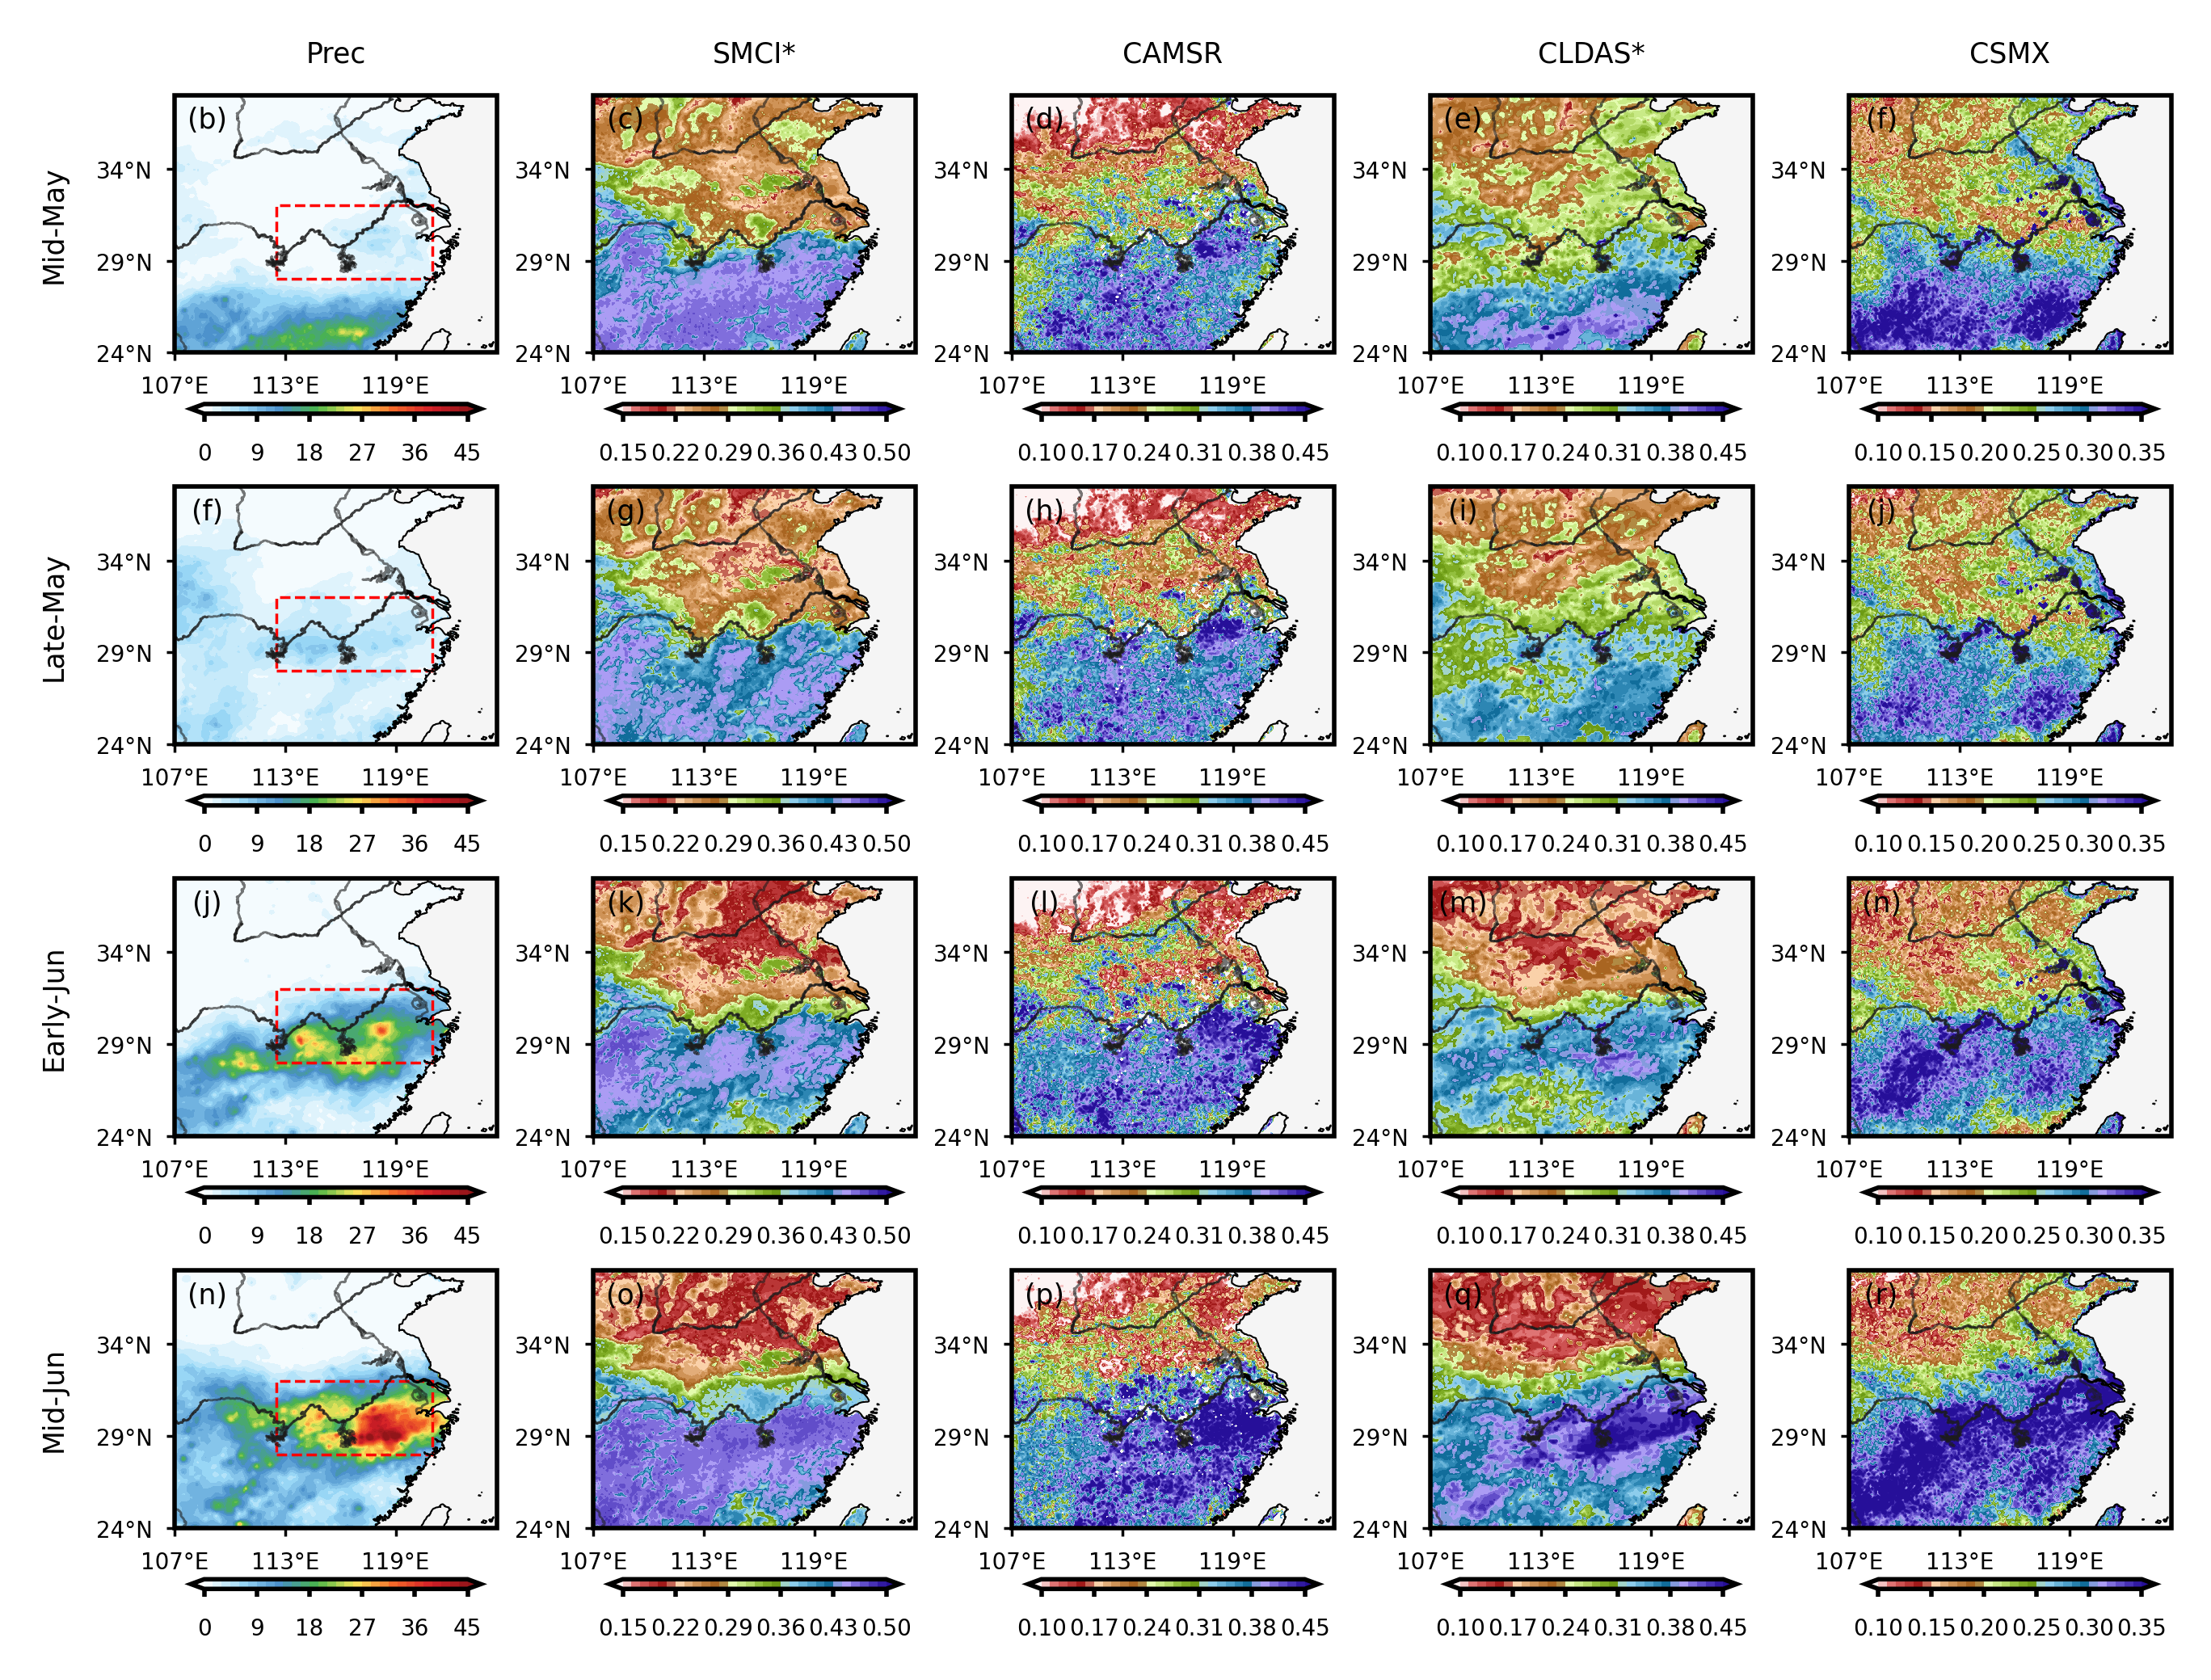

In [ ]:
# 设置绘图区域
domain = [25-1, 39-1, 107, 124.5]
# ----------------------------可视化：设置基本参数-------------------------------
common_params = {
    'width': 3.2,
    'Height': 2.3,  
    'dpi': 350,
    'title_labelsize': 5,
    'xy_labelsize': 5-1,
    'cbar_Legend_size': 5,
    'Grid': True,
    'Save': True,
    'Shp': False,
    'River': True,
    # 'Basin': True,
    # 'Topo': False
}
cmap = cmaps.MPL_StepSeq
# 定义变量信息
variables_info = [
    {"VarName": "Prec", "UNIT": 'mm/day', "CMAP": cmaps.WhiteBlueGreenYellowRed, "plotMIN": 0, "plotMAX1": 45},
    {"VarName": "SMCI*", "UNIT": 'm3/m3', "CMAP": cmap, "plotMIN": 0.15, "plotMAX1": 0.5},
    {"VarName": "AMSR_CN*", "UNIT": 'm3/m3', "CMAP": cmap, "plotMIN": 0.1, "plotMAX1": 0.45},
    # {"VarName": "GDS_Daily", "UNIT": 'm3/m3', "CMAP": cmap, "plotMIN": 0.1, "plotMAX1": 0.4},
    {"VarName": "CLDAS*", "UNIT": 'm3/m3', "CMAP": cmap, "plotMIN": 0.1, "plotMAX1": 0.45},
    {"VarName": MODEL_NAME, "UNIT": 'm3/m3', "CMAP": cmap, "plotMIN": 0.1, "plotMAX1": 0.35},
]
# 读取经纬度数据
with Dataset(f"/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/SpatialPattern/nc/10km/{MODEL_NAME}/20110515.{MODEL_NAME}_SM000010.nc") as Geo_nc:
    lat = Geo_nc.variables['lat'][:]
    lon = Geo_nc.variables['lon'][:]

# 创建图形和子图
fig, axes = plt.subplots(4, 5, figsize=(5.1/4*5, 5.), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=500, sharex=True)

YEAR = 2011  # 假设 YEAR 已在其他地方定义，如果这里需要定义请取消注释
SubsetDomain = False
# 循环处理每个变量
for col, var_info in enumerate(variables_info):
    if col==0:
        IF_Rectangle=True
    else:
        IF_Rectangle=False
    for row in range(4):
        # print(row, col)
        ax = axes[row, col]
        DrawingOrder = row * 4 + col + 1
        if row==0:
            start_date, end_date, period_name =get_month_period(1, YEAR, 5)
        elif row==1:
            start_date, end_date, period_name =get_month_period(2, YEAR, 5)
        elif row==2:
            start_date, end_date, period_name =get_month_period(0, YEAR, 6)
        elif row==3:
            start_date, end_date, period_name =get_month_period(1, YEAR, 6)
        # print(start_date, end_date)
        VAR = readVar(var_info["VarName"], start_date, end_date)
        draw_2DVAR_subplot(
            domain, var_info["plotMIN"], var_info["plotMAX1"],
            lon, lat, VAR, title=None, cbarTitle=f'[{var_info["UNIT"]}]',
            CMAP=var_info["CMAP"], 
            save_name=False,
            **common_params, Topo=False, DEM=None, ax=ax, Cbar="subcbar", IF_Rectangle=IF_Rectangle
        )
        
        if col==0:
            ax.set_ylabel(period_name, fontsize=5, rotation=90, labelpad=5) #,fontweight='bold'
        if row==0:
            if var_info["VarName"] == MODEL_NAME:
                # print(np.nanmax(VAR))
                title=MODEL_FULL_FNAME
            elif var_info["VarName"] == 'AMSR_CN*':
                title='CAMSR'
            else:
                title=var_info['VarName']
            ax.set_title(title, fontsize=5)
        ax.text(0.1, 0.85, f"({get_letter(DrawingOrder)})", transform=ax.transAxes, fontsize=5, va='bottom', ha='center')


# plt.subplots_adjust(left=0.18 , bottom=0.08,right=0.85,top=0.95,wspace=0.25,hspace=0.05)
plt.subplots_adjust(wspace=0.3,hspace=0.03)
plt.show()



In [ ]:

def save_files(save_path, filename, dataframe):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    file = os.path.join(save_path, filename)
    extension = filename.split('.')[-1]
    
    if extension == 'txt':
        dataframe.to_csv(file, index=False, sep='\t', header=False)
    elif extension == 'csv':
        dataframe.to_csv(file, index=False)
    elif extension == 'xlsx':
        dataframe.to_excel(file, index=False)
    elif extension == 'h5':
        dataframe.to_hdf(file, key='data', mode='w', format='table')
    else:
        print("Unsupported file format")
def abbre_to_full(abbreviation):
    # 定义缩写到全称的映射字典
    abbreviation_mapping = {
        "RF": "RandomForest",
        "LGBM": "LightGBM",
        "CB": "CSMX",
        "XGB": "XGBoost",
    }

    # 查找缩写对应的全称
    full_name = abbreviation_mapping.get(abbreviation.upper())

    if full_name:
        return full_name
    else:
        return f"未找到 '{abbreviation}' 的全称。"
def QC_of_instu_Data(DataFrame_ORI):
    # --------------------------筛选LST>273K的数据-------------------------------
    # final_data = final_data[final_data['LST']>273]
    final_data = DataFrame_ORI.copy()
    cols_SM = ['OBS_SM_10cm', 
           'GLDAS_Noah', 'GLDAS_CLSM','ERA5_Land', "ERA5" ,'SMC_SM', 'GDS_SM',
           'SMCI1km_SM','CLDAS_SM'
           ]
    cols_SM_all = ['OBS_SM_10cm', 
           'GLDAS_Noah', 'GLDAS_CLSM','ERA5_Land', "ERA5" ,'SMC_SM', 'GDS_SM',
           'SMCI1km_SM','CLDAS_SM',
           'CB_grid', 'GDS_Daily_SM',
           ]
    cols_CMFD = ["Prec"]
    # ----------------识别缺测值------------------
    final_data[cols_SM] = final_data[cols_SM]*0.01
    for col_SM in cols_SM_all:    
        final_data.loc[(final_data[col_SM] < 0) | (final_data[col_SM] > 0.5) , col_SM] = np.nan
    for col_CMFD in cols_CMFD:   
        final_data.loc[(final_data[col_CMFD] < 0) | (final_data[col_CMFD] > 1000) , col_CMFD] = np.nan
    # ----------------填充缺测值 中位数填充------------------
    # --------土壤湿度--------
    for col_SM in cols_SM:    
        final_data[col_SM].fillna(final_data[col_SM].median(),inplace=True)
    # --------CMFD----------

    for col_CMFD in cols_CMFD: 
        final_data[col_CMFD].fillna(final_data[col_CMFD].median(),inplace=True)        
    final_data.dropna()
    return final_data
def StandardScalerDF(dfQC):
    db_df_standard = dfQC.copy()
    # 进行标准化
    from sklearn.preprocessing import StandardScaler
    features = ['CLDAS_SM','SMCI1km_SM', 'GDS_Daily_SM', 'CB_grid', 'GLDAS_CLSM','OBS_SM_10cm', 'GLDAS_Noah', 'ERA5_Land', 'ERA5']
    X = dfQC[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    db_df_standard[features] = X_scaled 
    return db_df_standard
# =============================================================================
# 定义文件路径
# file_path = os.path.join(DatabasePath, "2010_2017_DFRI_merged_test_SM.h5")
file_path = os.path.join(DatabasePath, "2010_2017_DFRI_merged_test_SM_GDS_Daily.h5")
db_df =pd.read_hdf(file_path)
print(db_df.columns)
# 质量控制
dfQC = QC_of_instu_Data(db_df) # 质量控制
SM_datas = ["GAMSR","CAMSR","CLDAS" , "GLDAS-CLSM", "GLDAS-Noah", "ERA5-Land" ,"ERA5" ,"SMCI" ,MODEL_NAME,'OBS']
dataframe = dfQC.copy()
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
# 筛选江淮流域，2~9月站点的数据
jhuai_df = dataframe[(dataframe['Latitude'] >= 27) & (dataframe['Latitude'] <= 34) & 
                 (dataframe['Longitude'] >= 110) & (dataframe['Longitude'] <= 122+0)]

jhuai_df = jhuai_df[
                    ((jhuai_df['Date'].dt.month >= 2) & 
                     (jhuai_df['Date'].dt.month <= 9))]
# ---------------------------------------------------
# 统计站点数量
import pandas as pd

# 计算总共有多少个不同的站点
site_count = jhuai_df['ID'].nunique()

# 计算每个站点的观测天数
# 首先确保日期列是 datetime 类型
jhuai_df['Date'] = pd.to_datetime(jhuai_df['Date'])

# 然后按 'ID' 进行分组，计算每一组的长度（即观测天数）
observation_days_per_site = jhuai_df.groupby('ID').size().reset_index(name='observation_days')

print(f"Total number of unique sites: {site_count}")
print("Observation days per site:")
print(observation_days_per_site)

# 剔除观测天数小于180*8（即1440天）的站点
valid_sites = observation_days_per_site[observation_days_per_site['observation_days'] >= 1440]['ID']
print(len(valid_sites))
# 创建新的DataFrame jhuai_dfQC，只包含有效站点的数据
jhuai_dfQC = jhuai_df[jhuai_df['ID'].isin(valid_sites)]
# 
'''
Qiu, J., He, C., Liu, X., Gao, L., Tan, C., Wang, X., Kong, D., Wigneron, J.-P., Chen, D., and Xia, J.: 
Projecting dry-wet abrupt alternation across China from the perspective of soil moisture,
npj Climate and Atmospheric Science, 7, 269, https://doi.org/10.1038/s41612-024-00808-w, 2024.
'''

test_df =jhuai_dfQC.groupby('Date')[[
    # 'AMSR_CN_SM', 'FY_SM', 
    'CLDAS_SM','SMCI1km_SM','GDS_Daily_SM' , 'CB_grid', 'GLDAS_CLSM','OBS_SM_10cm', 'GLDAS_Noah', 'ERA5_Land', 'ERA5', 'Prec']].mean()
test_df = test_df.reset_index()
columns_to_average = [
    'CLDAS_SM',
    'SMCI1km_SM',
    'SMC_SM',
    'GDS_SM',
    # 'AMSR_CN_SM',
    'GDS_Daily_SM',
    'CB_grid',
    'GLDAS_CLSM',
    'OBS_SM_10cm',
    'GLDAS_Noah',
    'ERA5_Land',
    'ERA5',
    'Prec'
]
def MinMaxScalerDF(dataframe, colSM):
    df_standard =dataframe.copy()
    # 进行最大最小值归一化
    from sklearn.preprocessing import MinMaxScaler
    # features = ['CLDAS_SM', 'SMCI1km_SM', 'CB_grid', 'GLDAS_CLSM', 'OBS_SM_10cm', 'GLDAS_Noah', 'ERA5_Land', 'ERA5']
    features = [colSM]
    X = dataframe[features]
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    df_standard[features] = X_scaled
    return df_standard
# 按照 Date 列进行分组，并对指定列计算平均值
# colSM = 'ERA5'

# print(test_df.columns, test_df['Date'])
DeltaT = 7
for colSM in ['CLDAS_SM', 'SMCI1km_SM', 'GDS_Daily_SM' , 'CB_grid', 'GLDAS_CLSM', 'OBS_SM_10cm', 'GLDAS_Noah', 'ERA5_Land', 'ERA5']:
# for colSM in ['CLDAS_SM']:
    template_df = test_df[['Date',colSM]]
    template_df = template_df.reset_index()
    # test_df[f'{colSM}_CI'] = None
    # test_df[f'{colSM}_SMA'] = None
    print(colSM)
    for DateIndex in range(7,len(template_df)-7): # 掐头去尾（7天）
        
        # 标准化和累计求和
        SubsetDf = template_df.loc[DateIndex-DeltaT:DateIndex+DeltaT]
        df_standard = MinMaxScalerDF(SubsetDf, colSM)
        df_standard = df_standard.reset_index(drop=True)
        df_standard['Index'] = df_standard.index
        df_standard['AccSM'] = df_standard[colSM].cumsum()
        
        # 计算积分
        from scipy import integrate
        X = df_standard['Index']
        Y = df_standard['AccSM']
        S1 = integrate.trapezoid(Y, X) 
        S2 = df_standard['AccSM'].iloc[-1]*DeltaT*2
        CIsm = (S1-S2)/S2
    
        # 计算 SMA
        Date = template_df['Date'].iloc[DateIndex]  
        SMmean = template_df[(template_df['Date'].dt.month==Date.month) & (template_df['Date'].dt.day==Date.day)].mean()
        SMA = (template_df[colSM].iloc[DateIndex] -SMmean[colSM])/SMmean[colSM]*100
        # print(SMA)
        # 赋值
        test_df.at[DateIndex, f'{colSM}_CI'] = CIsm
        test_df.at[DateIndex, f'{colSM}_SMA'] = SMA
        # print(test_df.at[DateIndex, f'{colSM}_SMA'])

    # THneg = template_df[template_df[f'{colSM}_CI'] < 0][f'{colSM}_CI'].quantile(0.1)
print(test_df.columns)
# test_df['ID'] = test_df['ID'].astype(str)  # 强制转换为字符串
test_df.to_hdf("/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/DFRI/DFRI_GDS_Daily.h5", key='data', mode='w', format='table')





Index(['ID', 'Date', 'CB_grid', 'GLDAS_CLSM', 'OBS_SM_10cm', 'GLDAS_Noah',
       'ERA5_Land', 'ERA5', 'Prec', 'GDS_Daily_SM', 'Latitude', 'Longitude',
       'CLDAS_SM', 'SMCI1km_SM', 'SMC_SM', 'GDS_SM'],
      dtype='object')


/tmp/ipykernel_268935/2922263420.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data[col_SM].fillna(final_data[col_SM].median(),inplace=True)
/tmp/ipykernel_268935/2922263420.py:97: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Total number of unique sites: 368
Observation days per site:
        ID  observation_days
0    56580               236
1    57077              1615
2    57156              1434
3    57169              1598
4    57171              1449
..     ...               ...
363  P2155              1232
364  P2610              1295
365  P2772              1149
366  P4168              1237
367  Q3795              1263

[368 rows x 2 columns]
127
CLDAS_SM
SMCI1km_SM
GDS_Daily_SM
CB_grid
GLDAS_CLSM
OBS_SM_10cm
GLDAS_Noah
ERA5_Land
ERA5
Index(['Date', 'CLDAS_SM', 'SMCI1km_SM', 'GDS_Daily_SM', 'CB_grid',
       'GLDAS_CLSM', 'OBS_SM_10cm', 'GLDAS_Noah', 'ERA5_Land', 'ERA5', 'Prec',
       'CLDAS_SM_CI', 'CLDAS_SM_SMA', 'SMCI1km_SM_CI', 'SMCI1km_SM_SMA',
       'GDS_Daily_SM_CI', 'GDS_Daily_SM_SMA', 'CB_grid_CI', 'CB_grid_SMA',
       'GLDAS_CLSM_CI', 'GLDAS_CLSM_SMA', 'OBS_SM_10cm_CI', 'OBS_SM_10cm_SMA',
       'GLDAS_Noah_CI', 'GLDAS_Noah_SMA', 'ERA5_Land_CI', 'ERA5_Land_SMA',
       'ERA5_CI', 'ERA5_

In [5]:
VarColorsDict = {"GAMSR":"#FFF68F","CAMSR":"#CDBE70","GDS-Daily":"#838B8B",
                 "ERA5": "#63B8FF", "ERA5-Land": "#4682B4", 
                 "SMCI": "#FF7F24", 
                 "GLDAS-Noah": "#9ACD32", "GLDAS-CLSM":"#698B22",
                 "CLDAS": "#CD5555",
                 MODEL_FULL_FNAME: "#8968CD"}

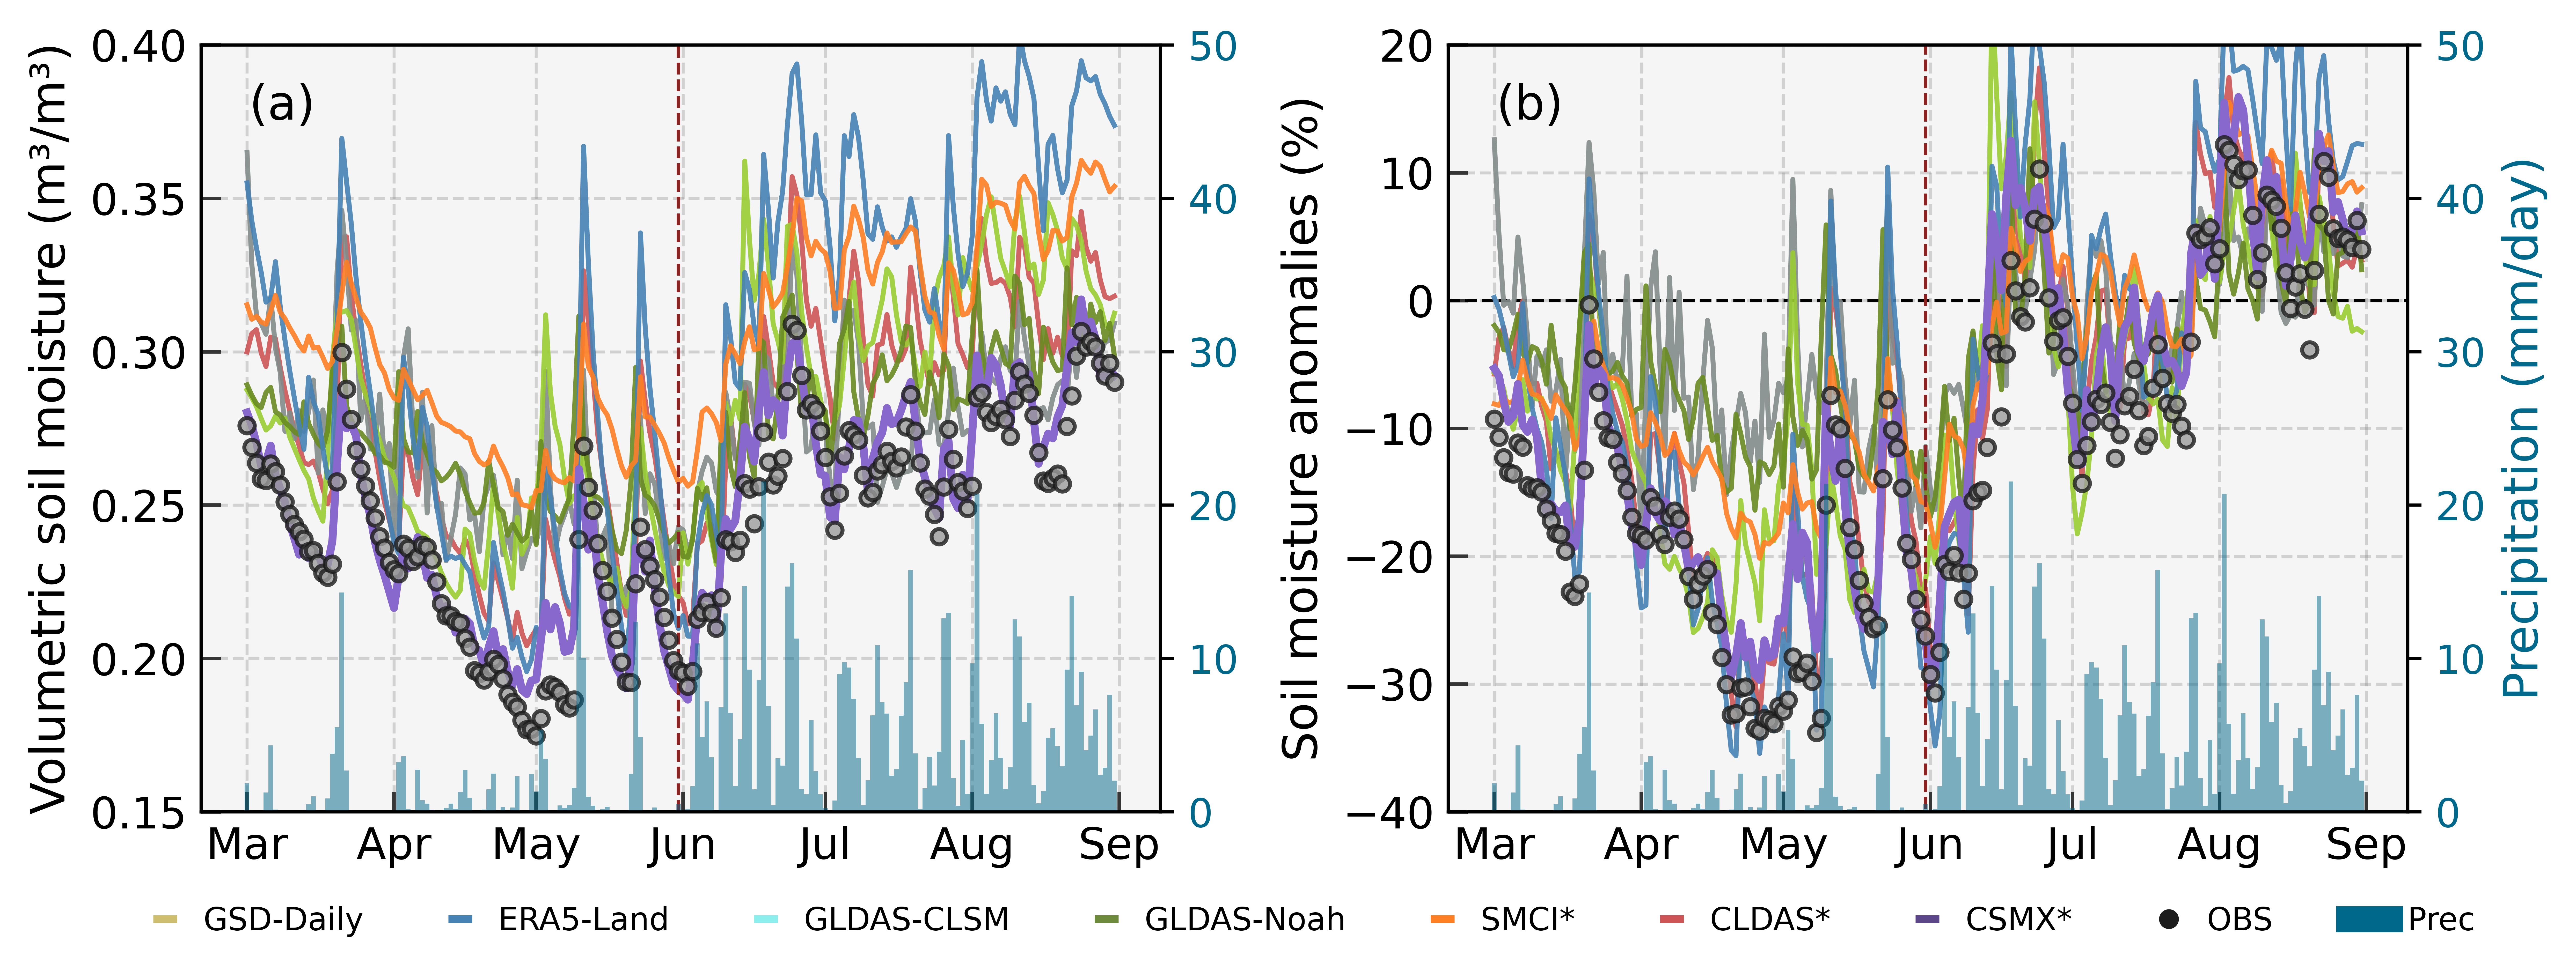

                 SM  Drought Index  Flood Index  DTF Index  \
0   OBS_SM_10cm_SMA       -33.7777      12.2045    22.9911   
4       CB_grid_SMA       -29.6725      15.9244    22.7984   
6    GLDAS_Noah_SMA       -25.9683      24.1960    25.0822   
3      CLDAS_SM_SMA       -33.3634      18.2039    25.7837   
1    SMCI1km_SM_SMA       -20.1577      15.5127    17.8352   
7     ERA5_Land_SMA       -35.6003      23.6088    29.6045   
8          ERA5_SMA       -36.4127      24.6967    30.5547   
5    GLDAS_CLSM_SMA       -16.3960      11.8788    14.1374   
2  GDS_Daily_SM_SMA       -18.3735       9.9004    14.1370   

   Diff Drought Index  Diff Flood Index  Diff DTF Index  
0              0.0000            0.0000          0.0000  
4              4.1052            3.7199          0.1927  
6              7.8094           11.9915          2.0911  
3              0.4143            5.9994          2.7926  
1             13.6200            3.3082          5.1559  
7              1.8226          

/tmp/ipykernel_268935/4252572093.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_df['Date'] = pd.to_datetime(ID_df['Date'])


SM  Drought Index  Flood Index  DTF Index  \
0   OBS_SM_10cm_SMA       -33.7777      12.2045    22.9911   
4       CB_grid_SMA       -29.6725      15.9244    22.7984   
6    GLDAS_Noah_SMA       -25.9683      24.1960    25.0822   
3      CLDAS_SM_SMA       -33.3634      18.2039    25.7837   
1    SMCI1km_SM_SMA       -20.1577      15.5127    17.8352   
7     ERA5_Land_SMA       -35.6003      23.6088    29.6045   
8          ERA5_SMA       -36.4127      24.6967    30.5547   
5    GLDAS_CLSM_SMA       -16.3960      11.8788    14.1374   
2  GDS_Daily_SM_SMA       -18.3735       9.9004    14.1370   

   Diff Drought Index  Diff Flood Index  Diff DTF Index  
0              0.0000            0.0000          0.0000  
4              4.1052            3.7199          0.1927  
6              7.8094           11.9915          2.0911  
3              0.4143            5.9994          2.7926  
1             13.6200            3.3082          5.1559  
7              1.8226           11.4043          6.6134  
8              2.6350           12.4922          7.5636  
5             17.3817            0.3257          8.8537  
2             15.4042            2.3041          8.8541

In [ ]:
# =============================================================================
test_df = pd.read_hdf("/home/yfdong/data/work/SMmerge/CN/merge/code/analysis_code/DFRI/DFRI_GDS_Daily.h5")
test_df =test_df.dropna()
ID_df = test_df[(test_df['Date'].dt.year == 2011) & 
                    ((test_df['Date'].dt.month >= 3) & 
                     (test_df['Date'].dt.month <= 8))]
ID_df.loc[:, "Date"] = pd.to_datetime(ID_df["Date"], format="%Y-%m-%d %H:%M:%S")

xy_labelsize = 11
legend_size = 8
axplot_linewidth = 1.25
axplot_alpha = 0.9

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5),sharex=True, dpi=1100)

ax1 = axes[1]
# 设置绘图区背景颜色
ax1.set_facecolor('#F5F5F5')
# 绘制干旱警戒线
ax1.axhline(y=0, color='black', linewidth=0.80, linestyle='--')
# 绘制折线图
ax1.plot(ID_df["Date"].values, ID_df["CLDAS_SM_SMA"].values, color = VarColorsDict['CLDAS'], linewidth = axplot_linewidth , label="CLDAS",  alpha = axplot_alpha)    
# ax1.plot(ID_df["Date"].values, ID_df["AMSR_CN_SM_SMA"].values, color = VarColorsDict['CAMSR'], linewidth = axplot_linewidth , label="CLDAS",  alpha = axplot_alpha)    
# ax1.plot(ID_df["Date"].values, ID_df["AMSR_SM_SMA"].values, color = VarColorsDict['GAMSR'], linewidth = axplot_linewidth , label="CLDAS",  alpha = axplot_alpha)    
ax1.plot(ID_df["Date"].values, ID_df["GDS_Daily_SM_SMA"].values, color = VarColorsDict['GDS-Daily'], linewidth = axplot_linewidth , label="GDS-Daily",  alpha = axplot_alpha) 
ax1.plot(ID_df["Date"].values, ID_df["GLDAS_Noah_SMA"].values, color = VarColorsDict['GLDAS-Noah'], linewidth = axplot_linewidth , label="GLDAS-Noah",  alpha = axplot_alpha) 
ax1.plot(ID_df["Date"].values, ID_df["GLDAS_CLSM_SMA"].values, color = VarColorsDict['GLDAS-CLSM'], linewidth = axplot_linewidth , label="GLDAS_CLSM",  alpha = axplot_alpha) 
ax1.plot(ID_df["Date"].values, ID_df["ERA5_Land_SMA"].values, color = VarColorsDict['ERA5-Land'], linewidth = axplot_linewidth , label="ERA5_Land",  alpha = axplot_alpha)# Blue
ax1.plot(ID_df["Date"].values, ID_df['SMCI1km_SM_SMA'].values, color = VarColorsDict['SMCI'], linewidth = axplot_linewidth , label="SMCI",  alpha = axplot_alpha) # Golde        
ax1.plot(ID_df["Date"].values, ID_df['CB_grid_SMA'].values, color = VarColorsDict[MODEL_FULL_FNAME], linewidth = 2 , label='CSMX') # purple
ax1.scatter(ID_df["Date"],ID_df["OBS_SM_10cm_SMA"],facecolors='#9C9C9C', edgecolors= "#1C1C1C", s =15, alpha = 0.8, label="OBS", zorder=10)
# 时间标签设置
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
# 找到 Date 为 2011-05-31 的索引
target_date = pd.Timestamp('2011-05-31')
index = ID_df[ID_df["Date"] == target_date].index[0]

ax2 = ax1.twinx()  # 创建共享x轴的第二个坐标轴
# 设置坐标轴标签和样式
# ax1.set_xlabel("Date", fontsize=10)
ax1.set_ylabel("Soil moisture anomalies (%)", fontsize=12)
ax2.set_ylabel("Precipitation (mm/day)", fontsize=12, color="#00688B")
ax2.tick_params(axis='y', labelcolor="#00688B")
# 绘制降水柱状图（右侧坐标轴）
ax2.bar(ID_df["Date"], ID_df['Prec'].values, 
       width=1, alpha=0.5, 
       color="#00688B", label="Precipitation")
# 设置Y轴范围（根据实际数据调整）
ax2.set_ylim(0, 50)   # 降水典型范围
# 绘制红色虚线标记
for column in ["OBS_SM_10cm", "CLDAS_SM", "GLDAS_Noah", "ERA5_Land", "SMCI1km_SM", "CB_grid"]:
    ax1.plot([ID_df["Date"][index], ID_df["Date"][index]], [-45., 20], color='#8B2323', linestyle='--', linewidth=0.8) #'#4682B4'
ax1.set_ylim(-40, 20)

# 创建文本框，将文本置于文本框内
bbox = {"facecolor": "white", "alpha": 0.3, "edgecolor": "none"}
# 所有文本使用统一的样式
styles = {"size": xy_labelsize, "color": "black", "bbox": bbox}
# 调整刻度线参数：
# ax1.minorticks_on()
# 显示副刻度线
ax1.tick_params(axis="both", which="major", direction="in", width=0.9, length=5, color='#363636')
# ax1.tick_params(axis="both", which="minor", direction="in", width=0.55, length=1, color='#363636')
# grid 设置网格线性
ax1.grid(True, which="major", linestyle="--", color="gray", linewidth=0.75, alpha = 0.3)
# ax1.grid(True, which="minor", linestyle=":", color="gray", linewidth=0.55, alpha = 0.1)
# 设置x轴和y轴数字大小
ax1.tick_params(axis='x', labelsize = xy_labelsize)
ax1.tick_params(axis='y', labelsize = xy_labelsize)
ax1.text(0.05, 0.95, '(b)', fontsize=12, va='top', ha='left', transform=ax1.transAxes)
# ax1.set_title(0, 0.9, '(a)', fontsize=12, va='top', ha='left')
# 

ax3 = axes[0]
# 设置绘图区背景颜色
ax3.set_facecolor('#F5F5F5')
# 绘制干旱警戒线
ax3.axhline(y=0, color='black', linewidth=0.80, linestyle='--')
# 绘制折线图
ax3.plot(ID_df["Date"].values, ID_df["CLDAS_SM"].values, color = VarColorsDict['CLDAS'], linewidth = axplot_linewidth , label="CLDAS",  alpha = axplot_alpha)    
ax3.plot(ID_df["Date"].values, ID_df["GDS_Daily_SM"].values, color = VarColorsDict['GDS-Daily'], linewidth = axplot_linewidth , label="GDS-Daily",  alpha = axplot_alpha) 
ax3.plot(ID_df["Date"].values, ID_df["GLDAS_Noah"].values, color = VarColorsDict['GLDAS-Noah'], linewidth = axplot_linewidth , label="GLDAS_Noah",  alpha = axplot_alpha) 
ax3.plot(ID_df["Date"].values, ID_df["GLDAS_CLSM"].values, color = VarColorsDict['GLDAS-CLSM'], linewidth = axplot_linewidth , label="GLDAS_CLSM",  alpha = axplot_alpha) 
ax3.plot(ID_df["Date"].values, ID_df["ERA5_Land"].values, color = VarColorsDict['ERA5-Land'], linewidth = axplot_linewidth , label="ERA5_Land",  alpha = axplot_alpha)# Blue
ax3.plot(ID_df["Date"].values, ID_df['SMCI1km_SM'].values, color = VarColorsDict['SMCI'], linewidth = axplot_linewidth , label="SMCI",  alpha = axplot_alpha) # Golde        
ax3.plot(ID_df["Date"].values, ID_df['CB_grid'].values, color = VarColorsDict[MODEL_FULL_FNAME], linewidth = 2 , label='CSMX') # purple
ax3.scatter(ID_df["Date"],ID_df["OBS_SM_10cm"],facecolors='#9C9C9C', edgecolors= "#1C1C1C", s =15, alpha = 0.8, label="OBS", zorder=10)
# 时间标签设置
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
# 找到 Date 为 2011-05-31 的索引
target_date = pd.Timestamp('2011-05-31')
index = ID_df[ID_df["Date"] == target_date].index[0]

ax4 = ax3.twinx()  # 创建共享x轴的第二个坐标轴
# 设置坐标轴标签和样式
# ax3.set_xlabel("Date", fontsize=10)
ax3.set_ylabel("Volumetric soil moisture (m³/m³)", fontsize=12)
# ax4.set_ylabel("Precipitation (mm/day)", fontsize=12, color="#00688B")
ax4.tick_params(axis='y', labelcolor="#00688B")
# 绘制降水柱状图（右侧坐标轴）
ax4.bar(ID_df["Date"], ID_df['Prec'].values, 
       width=1, alpha=0.5, 
       color="#00688B", label="Precipitation")
# 设置Y轴范围（根据实际数据调整）
ax4.set_ylim(0, 50)   # 降水典型范围
# 绘制红色虚线标记
for column in ["OBS_SM_10cm", "CLDAS_SM", "GLDAS_Noah", "ERA5_Land", "SMCI1km_SM", "CB_grid"]:
    ax3.plot([ID_df["Date"][index], ID_df["Date"][index]], [0.15, 0.4], color='#8B2323', linestyle='--', linewidth=0.8) #'#4682B4'
ax3.set_ylim(0.15, 0.4)


# 创建文本框，将文本置于文本框内
bbox = {"facecolor": "white", "alpha": 0.3, "edgecolor": "none"}
# 所有文本使用统一的样式
styles = {"size": xy_labelsize, "color": "black", "bbox": bbox}
# 调整刻度线参数：
# ax3.minorticks_on()
# 显示副刻度线
ax3.tick_params(axis="both", which="major", direction="in", width=0.9, length=5, color='#363636')
# ax3.tick_params(axis="both", which="minor", direction="in", width=0.55, length=1, color='#363636')
# grid 设置网格线性
ax3.grid(True, which="major", linestyle="--", color="gray", linewidth=0.75, alpha = 0.3)
# ax3.grid(True, which="minor", linestyle=":", color="gray", linewidth=0.55, alpha = 0.1)
# 设置x轴和y轴数字大小
ax3.tick_params(axis='x', labelsize = xy_labelsize)
ax3.tick_params(axis='y', labelsize = xy_labelsize)
ax3.text(0.05, 0.95, '(a)', fontsize=12, va='top', ha='left', transform=ax3.transAxes)
# =============================================================================
# 添加总的legend
colors = ["#CDBE70", "#4682B4", "#8DEEEE", "#6E8B3D", "#FF7F24", "#CD5555",  "#5D478B", "#1C1C1C"]
labels = [ "GSD-Daily", "ERA5-Land", "GLDAS-CLSM", "GLDAS-Noah", "SMCI*", "CLDAS*", "CSMX*", "OBS"]
markers = ['_', '_', '_', '_', '_', '_', '_','.']  # 设置 OBS 为 'o'，其余为 '_'
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
# 创建图例的handles
legend_handles = [mlines.Line2D([], [], color=color, marker=marker, linestyle='None',
                                markersize=6, markeredgewidth=2, label=label)
                  for color, label, marker in zip(colors, labels, markers)]
# 定义 Prec 对应的信息
prec_color = '#00688B'  # 可以根据需要修改颜色
prec_label = 'Prec'
# 创建 Prec 对应的图例句柄（使用矩形表示柱状图）
prec_handle = mpatches.Patch(color=prec_color, label=prec_label)

# 将 Prec 的图例句柄添加到已有的图例句柄列表中
legend_handles.append(prec_handle)
# 设置字体属性
fontprops = fm.FontProperties(size= legend_size)

# 绘制图例
legend = fig.legend(handles=legend_handles, bbox_to_anchor=(-1.4, -0.2, 2.5, 0.1),
                    loc='lower center', bbox_transform=ax1.transAxes,
                    prop=fontprops, ncol=9, mode='expand', columnspacing=0.01,frameon=False,
                    labelspacing=0.5 ,# 图例项之间的垂直间距, ,
                    handletextpad=0.2,  # 图例标记与文本之间的间距
                )
plt.subplots_adjust(wspace=0.3)#,hspace=0.3)
# -------------------------------------保存图片------------------------------------
plt.show()
# =============================================================================
# 计算评分
ID_df['Date'] = pd.to_datetime(ID_df['Date'])

results = []
for colSM in ['OBS_SM_10cm_SMA','SMCI1km_SM_SMA','GDS_Daily_SM_SMA','CLDAS_SM_SMA', 'CB_grid_SMA', 'GLDAS_CLSM_SMA','GLDAS_Noah_SMA', 'ERA5_Land_SMA', 'ERA5_SMA']:
    FloodIndex_df = ID_df[((ID_df['Date'].dt.month >= 6) & 
                         (ID_df['Date'].dt.month <= 8))]
    FloodIndex = np.round( np.max(FloodIndex_df[colSM] ) ,4)
    DroughtIndex_df =ID_df[((ID_df['Date'].dt.month >= 3) & 
                         (ID_df['Date'].dt.month <= 5))]
    DroughtIndex = np.round( np.min(DroughtIndex_df[colSM] ) ,4)
    DTFindex = np.round( (FloodIndex - DroughtIndex)/2 ,4)
    # print(colSM, DroughtIndex, FloodIndex, DFIindex)
    result = {
        'SM': colSM,
        'Drought Index': DroughtIndex,
        'Flood Index': FloodIndex,
        'DTF Index': DTFindex
    }
    results.append(result)
df = pd.DataFrame(results)
df['Diff Drought Index'] = (df['Drought Index'] - df.loc[0, 'Drought Index']).abs()
df['Diff Flood Index'] = (df['Flood Index'] - df.loc[0, 'Flood Index']).abs()
df['Diff DTF Index'] = (df['DTF Index'] - df.loc[0, 'DTF Index']).abs()
# 按绝对差值进行排序
sorted_df = df.sort_values(by='Diff DTF Index')
print(sorted_df)
# print(df)
sorted_df.to_excel('DFRI_metric_bySMA.xlsx')
sorted_df